In [1]:
from TestSets import *
from PHDimPointCloud import *

import numpy as np
import gudhi as gd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from ripser import ripser

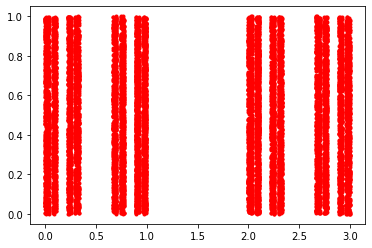

In [14]:
level = 6
max_points = 10000
jumping = 500

tmp = sampleCantorSetCrossInterval(max_points, level)

plt.scatter(tmp[:, 0], tmp[:, 1], c='r', marker='.') 
plt.show()
# disk_2d = sampleDisk2D(max_points)

In [3]:
max_points = 200000
disk_2d = sampleDisk2D(max_points)

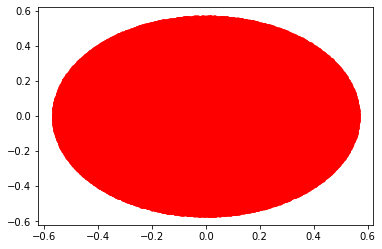

In [4]:
plt.scatter(disk_2d[:, 0], disk_2d[:, 1], c='r', marker='.') 
plt.show()

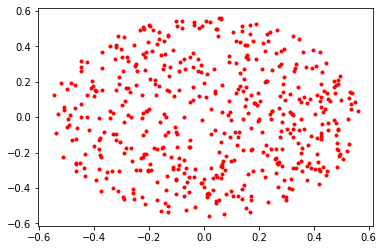

In [5]:
samples = disk_2d[np.random.choice(disk_2d.shape[0], 500, replace=False)]
plt.scatter(samples[:, 0], samples[:, 1], c='r', marker='.') 
plt.show()

In [ ]:
start_t = time.time()
rips_complex = gd.RipsComplex(points = disk_2d)
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 2)
end_t = time.time()
result_str = 'Rips complex is of dimension ' + str(simplex_tree.dimension()) + ' - ' + str(simplex_tree.num_simplices()) + ' simplices - ' + str(simplex_tree.num_vertices()) + ' vertices.\nRunning time: ' + str(end_t - start_t)
print(result_str)

In [6]:
start_t = time.time()
dgm = simplex_tree.persistence()
print("Running time: ", time.time() - start_t)

Running time:  161.83981108665466


In [7]:
print(dgm)

[(1, (0.03990373857918949, 0.09803952489556403)), (1, (0.046119654579758314, 0.10151236271596356)), (1, (0.03868001119836331, 0.0895171411617392)), (1, (0.04287174744316352, 0.09333932656257757)), (1, (0.0394765322352011, 0.08949513764365438)), (1, (0.042530264224563054, 0.08950599588946308)), (1, (0.04011797316432233, 0.08246719824844141)), (1, (0.04137808586475379, 0.07882049731398773)), (1, (0.04593310076568795, 0.08196447708735097)), (1, (0.045110449261544686, 0.08091294500715988)), (1, (0.037051381597148395, 0.07265146185099705)), (1, (0.047362064308291305, 0.08003025272037437)), (1, (0.06144044416792531, 0.09410567925695039)), (1, (0.04188452810968027, 0.07336042184626469)), (1, (0.05901216799240626, 0.08994681653943928)), (1, (0.04010319296217662, 0.06968466371843314)), (1, (0.04108655346411567, 0.06993051383107307)), (1, (0.04323043193443889, 0.07168753605212098)), (1, (0.050217238163472455, 0.07836044302142314)), (1, (0.04344729003856297, 0.07143265849321345)), (1, (0.04267731

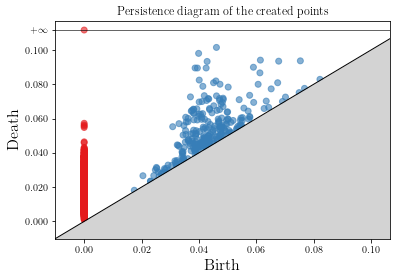

In [8]:
fig = gd.plot_persistence_diagram(dgm)
fig.set_title("Persistence diagram of the created points")
plt.show()

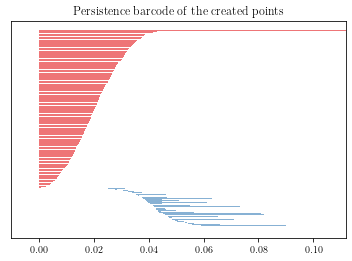

In [9]:
fig = gd.plot_persistence_barcode(dgm)
fig.set_title("Persistence barcode of the created points")
plt.show()

In [13]:
from ripser import ripser
from persim import plot_diagrams

In [11]:
start_t = time.time()
diagrams = ripser(disk_2d)['dgms']
print("Running time: ", time.time() - start_t)

Running time:  0.4777030944824219


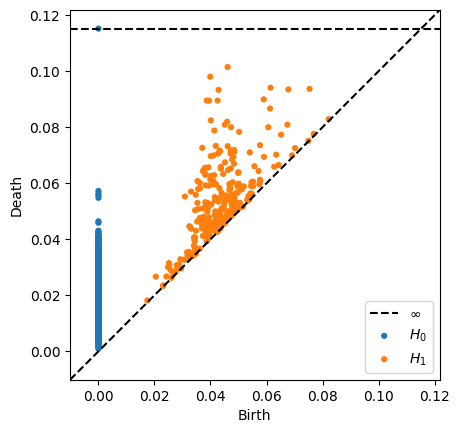

In [22]:
plot_diagrams(diagrams, show = True)

In [23]:
disk_2d = sampleDisk2D(2000)

In [24]:
start_t = time.time()
diagrams = ripser(disk_2d)['dgms']
print("Running time: ", time.time() - start_t)

Running time:  2.0277252197265625


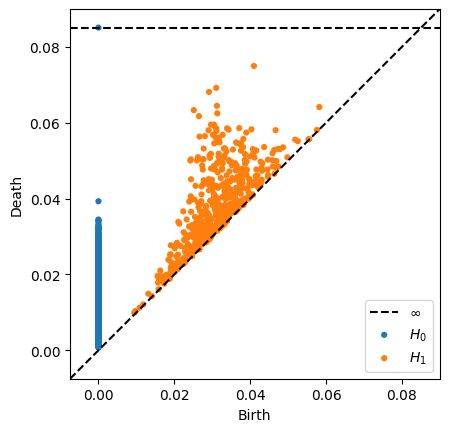

In [25]:
plot_diagrams(diagrams, show = True)

In [26]:
disk_2d = sampleDisk2D(10000)

In [64]:
start_t = time.time()
diagrams = ripser(samples)['dgms']
print("Running time: ", time.time() - start_t)

Running time:  0.12417197227478027


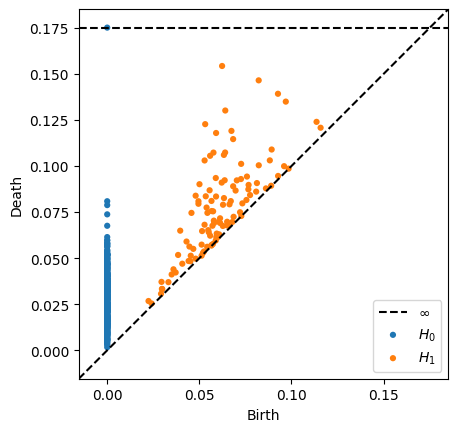

In [65]:
plot_diagrams(diagrams, show = True)

In [68]:
per_0 = np.array(diagrams[0])
# Max value not including inf
per_0[len(per_0)-1, 1] = per_0[len(per_0)-2, 1]
print(np.log((abs(per_0[:,1] - per_0[:,0])**1).sum()))

2.6810478636087973


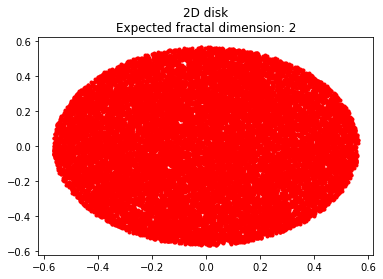

In [4]:
max_points = 20000
disk_2d = sampleDisk2D(max_points)
plt.scatter(disk_2d[:, 0], disk_2d[:, 1], c='r', marker='.') 
plt.title("2D disk\nExpected fractal dimension: 2")
plt.show()

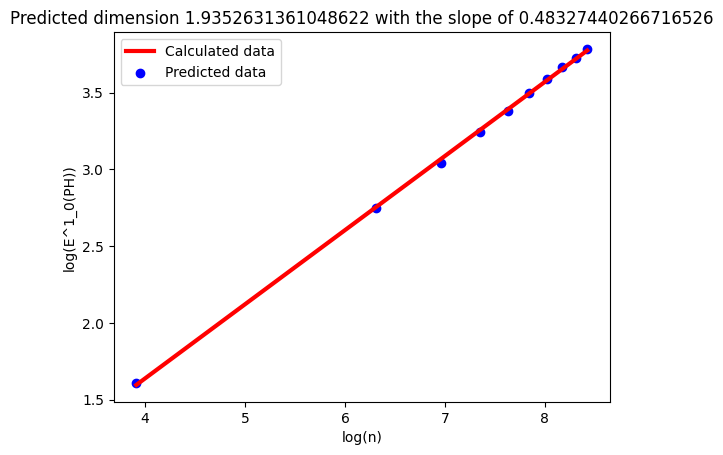

In [139]:
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(disk_2d, 0, 1, 5000)
plotting(0, 1, log_n, log_alpha_sum, est_dim, LR_fit)

In [142]:
dimension = 1
alpha = 1
max_sampling_size = 10000
step_size = 250
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(disk_2d, dimension, alpha, max_sampling_size, step_size)

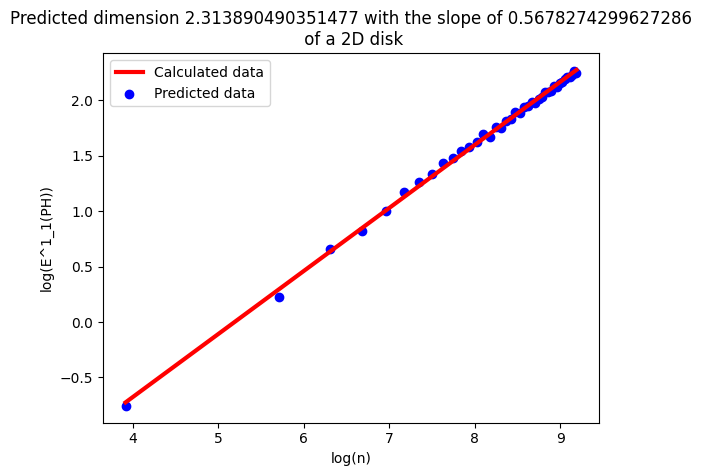

In [145]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D disk")

In [146]:
dimension = 0
alpha = 1
max_sampling_size = 10000
step_size = 250
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(disk_2d, dimension, alpha, max_sampling_size, step_size)

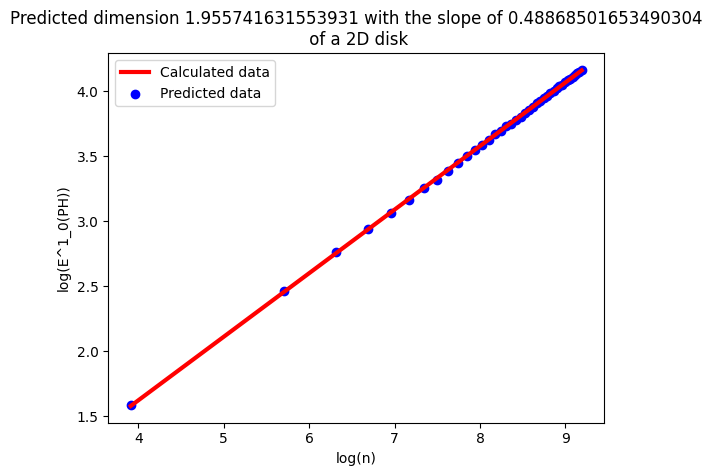

In [147]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D disk")

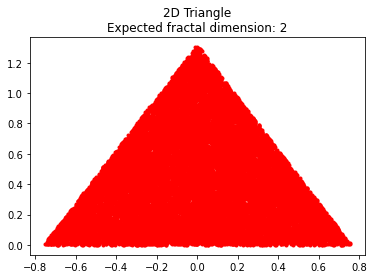

In [6]:
max_points = 20000
triangle_2d = sampleTriangle2D(max_points)
plt.scatter(triangle_2d[:, 0], triangle_2d[:, 1], c='r', marker='.') 
plt.title("2D Triangle\nExpected fractal dimension: 2")
plt.show()

In [151]:
dimension = 0
alpha = 1
max_sampling_size = 10000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(triangle_2d, dimension, alpha, max_sampling_size, step_size)

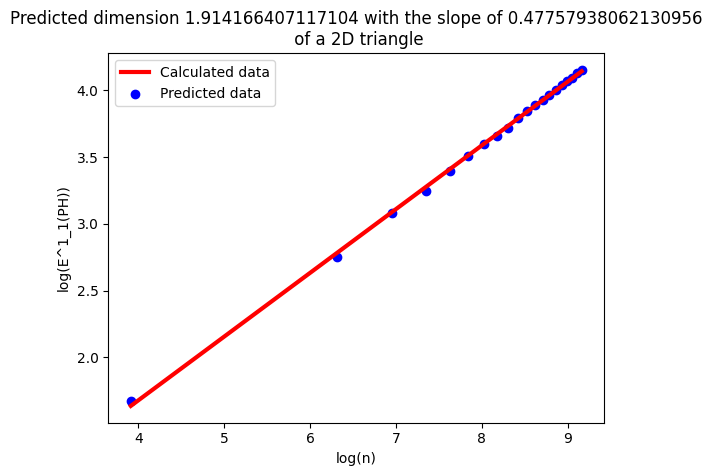

In [153]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D triangle")

In [154]:
dimension = 1
alpha = 1
max_sampling_size = 10000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(triangle_2d, dimension, alpha, max_sampling_size, step_size)

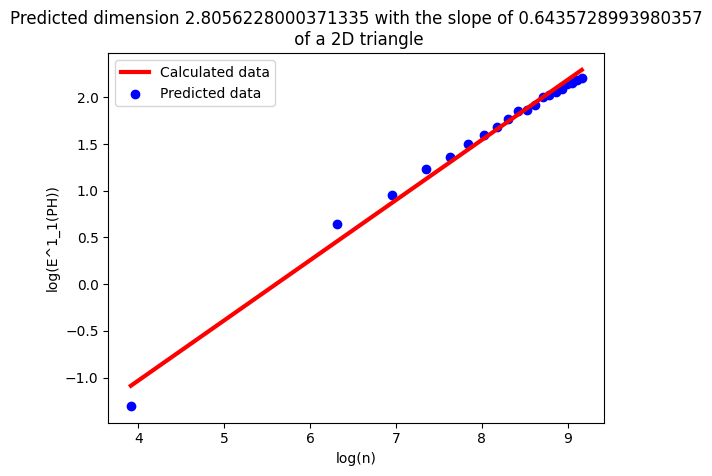

In [155]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D triangle")

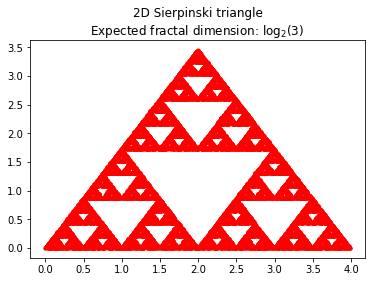

In [2]:
max_points = 20000
level = 8
sierpinski_2d = sampleSierpinski2D(max_points, level)
plt.scatter(sierpinski_2d[:, 0], sierpinski_2d[:, 1], c='r', marker='.') 
plt.title("2D Sierpinski triangle\nExpected fractal dimension: $\log_2(3)$")
plt.show()

In [24]:
no_samples = 5000
samples = sierpinski_2d[np.random.choice(sierpinski_2d.shape[0], no_samples, replace=False)]

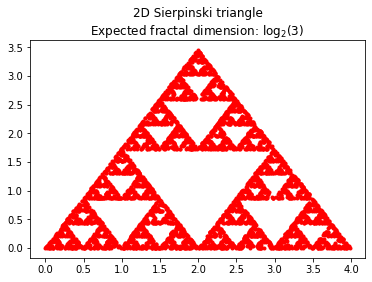

In [25]:
plt.scatter(samples[:, 0], samples[:, 1], c='r', marker='.') 
plt.title("2D Sierpinski triangle\nExpected fractal dimension: $\log_2(3)$")
plt.show()

In [26]:
start_t = time.time()
diagrams = ripser(samples)['dgms']
print("Running time: ", time.time() - start_t)

Running time:  186.9656479358673


In [3]:
dimension = 0
alpha = 1
max_sampling_size = 5000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(sierpinski_2d, dimension, alpha, max_sampling_size, step_size)

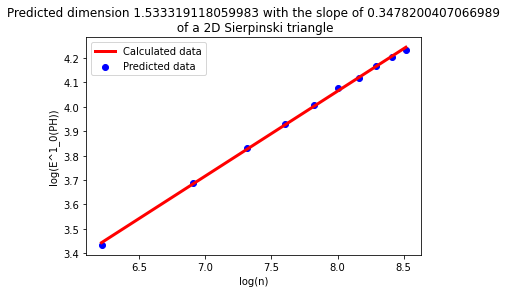

In [4]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D Sierpinski triangle")

In [5]:
dimension = 1
alpha = 1
max_sampling_size = 5000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(sierpinski_2d, dimension, alpha, max_sampling_size, step_size)

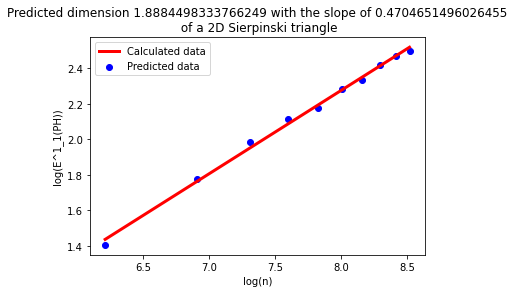

In [6]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D Sierpinski triangle")

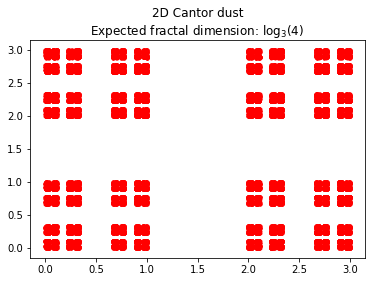

In [7]:
max_points = 20000
level = 8
cantor_dust_2d = sampleCantorDust2D(max_points, level)
plt.scatter(cantor_dust_2d[:, 0], cantor_dust_2d[:, 1], c='r', marker='.') 
plt.title("2D Cantor dust\nExpected fractal dimension: $\log_3(4)$")
plt.show()

In [8]:
dimension = 0
alpha = 1
max_sampling_size = 5000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cantor_dust_2d, dimension, alpha, max_sampling_size, step_size)

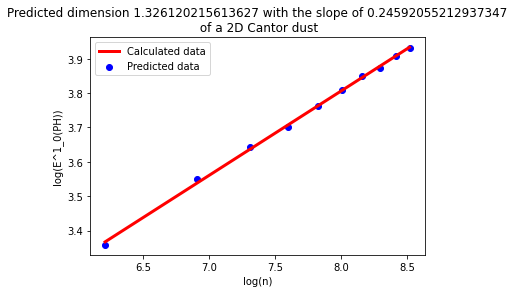

In [9]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D Cantor dust")

In [10]:
dimension = 1
alpha = 1
max_sampling_size = 5000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cantor_dust_2d, dimension, alpha, max_sampling_size, step_size)

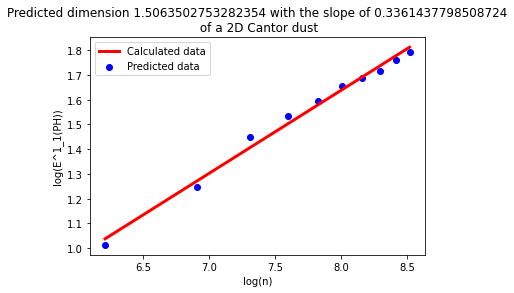

In [11]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D Cantor dust")

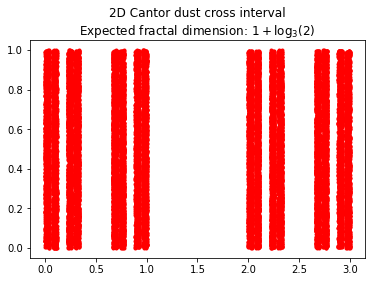

In [12]:
max_points = 20000
level = 8
cantor_dust_cross_interval_2d = sampleCantorSetCrossInterval(max_points, level)
plt.scatter(cantor_dust_cross_interval_2d[:, 0], cantor_dust_cross_interval_2d[:, 1], c='r', marker='.') 
plt.title("2D Cantor dust cross interval\nExpected fractal dimension: $1 + \log_3(2)$")
plt.show()

In [13]:
dimension = 0
alpha = 1
max_sampling_size = 5000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cantor_dust_cross_interval_2d, dimension, alpha, max_sampling_size, step_size)

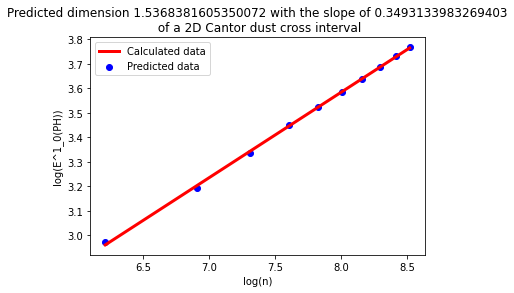

In [14]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D Cantor dust cross interval")

In [15]:
dimension = 1
alpha = 1
max_sampling_size = 5000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cantor_dust_cross_interval_2d, dimension, alpha, max_sampling_size, step_size)

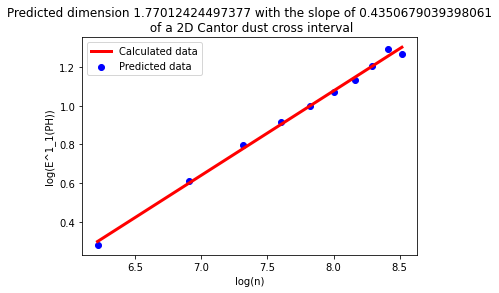

In [16]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D Cantor dust cross interval")

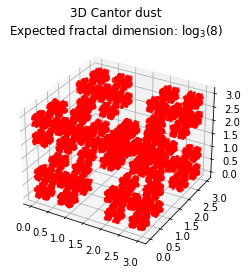

In [2]:
max_points = 20000
level = 8
cantor_dust_3d = sampleCantorDust3D(max_points, level)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cantor_dust_3d[:, 0], cantor_dust_3d[:, 1], cantor_dust_3d[:,2], c='r', marker='.') 
ax.set_title("3D Cantor dust\nExpected fractal dimension: $\log_3(8)$")
plt.show()

In [3]:
dimension = 0
alpha = 1
max_sampling_size = 7000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cantor_dust_3d, dimension, alpha, max_sampling_size, step_size)

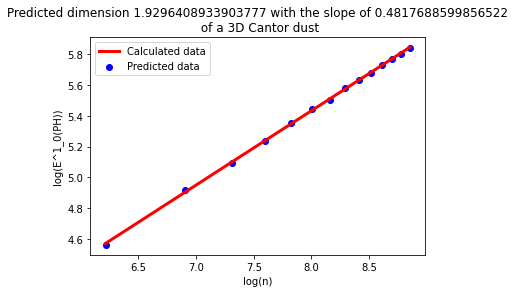

In [8]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Cantor dust")

In [9]:
dimension = 1
alpha = 1
max_sampling_size = 5000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cantor_dust_3d, dimension, alpha, max_sampling_size, step_size)

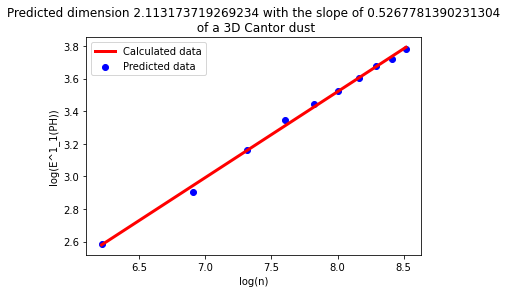

In [10]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Cantor dust")

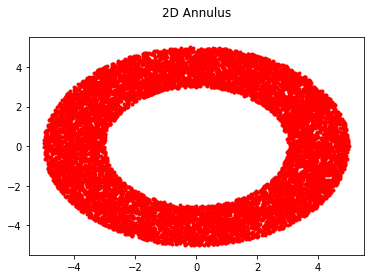

In [2]:
inner_dia = 3
outer_dia = 5
max_points = 10000
annulus = sampleAnnulus2D(max_points, outer_dia, inner_dia)

plt.scatter(annulus[:, 0], annulus[:, 1], c='r', marker='.') 
plt.title("2D Annulus\n")
plt.show()

In [6]:
samples = annulus[np.random.choice(annulus.shape[0], 3000, replace=False)]

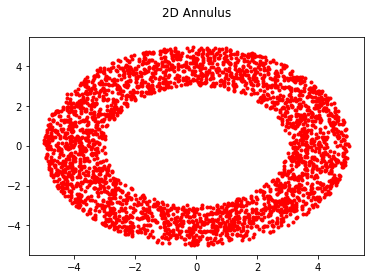

In [7]:
plt.scatter(samples[:, 0], samples[:, 1], c='r', marker='.') 
plt.title("2D Annulus\n")
plt.show()

In [8]:
start_t = time.time()
diagrams = ripser(samples)['dgms']
print("Running time: ", time.time() - start_t)

Running time:  154.0132520198822


In [9]:
dimension = 0
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(annulus, dimension, alpha, max_sampling_size, step_size)

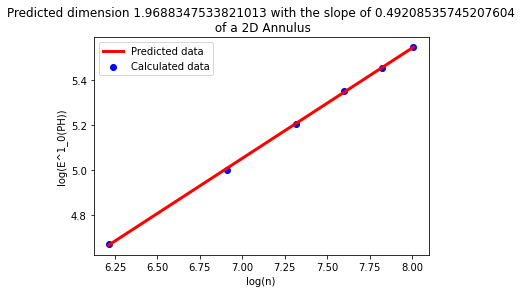

In [10]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D Annulus")

In [11]:
dimension = 1
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(annulus, dimension, alpha, max_sampling_size, step_size)

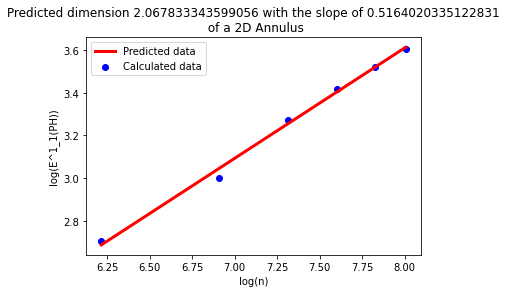

In [12]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "2D Annulus")

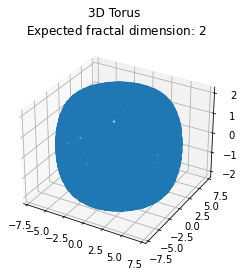

In [2]:
max_points = 10000
inner_dia = 2
outer_dia = 5
torus = sampleTorus3D(max_points, outer_dia, inner_dia)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(torus[:,0], torus[:,1], torus[:,2], 'xb')
ax.set_title("3D Torus \nExpected fractal dimension: $2$")
plt.show()

In [3]:
samples = torus[np.random.choice(torus.shape[0], 1000, replace=False)]

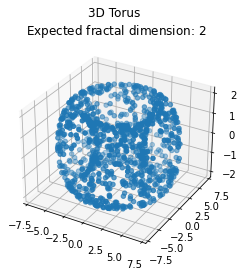

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(samples[:,0], samples[:,1], samples[:,2], 'xb')
ax.set_title("3D Torus \nExpected fractal dimension: $2$")
plt.show()

In [5]:
start_t = time.time()
diagrams = ripser(samples, 2)['dgms']
print("Running time: ", time.time() - start_t)

Running time:  137.89020705223083


In [30]:
dimension = 0
alpha = 1
max_sampling_size = 4000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus, dimension, alpha, max_sampling_size, step_size)

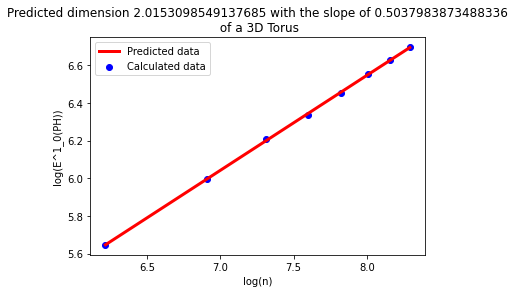

In [31]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus")

In [32]:
dimension = 1
alpha = 1
max_sampling_size = 4000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus, dimension, alpha, max_sampling_size, step_size)

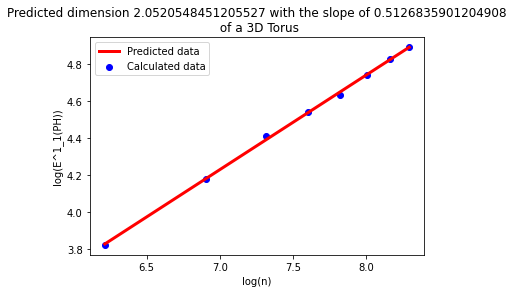

In [33]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus")

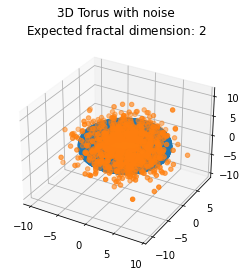

In [26]:
no_noise = 1000
max_points = 9000
inner_dia = 2
outer_dia = 5
torus = sampleTorus3D(max_points, outer_dia, inner_dia)
noise = sampleNoise(no_noise, torus.shape[1], np.std(torus))
torus_with_noise = np.concatenate((torus, noise))
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(torus[:,0], torus[:,1], torus[:,2], 'xb')
ax.scatter(noise[:,0], noise[:,1], noise[:,2], 'or')
ax.set_title("3D Torus with noise\nExpected fractal dimension: $2$")
plt.show()

In [27]:
torus_with_noise = np.concatenate((torus, noise))

In [28]:
dimension = 0
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus_with_noise, dimension, alpha, max_sampling_size, step_size)

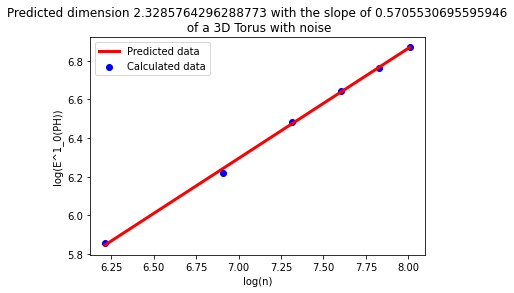

In [29]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus with noise")

In [30]:
dimension = 1
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus, dimension, alpha, max_sampling_size, step_size)

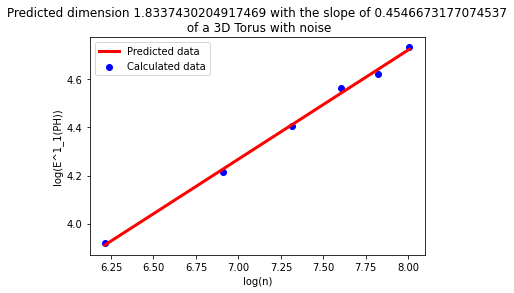

In [31]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus with noise")

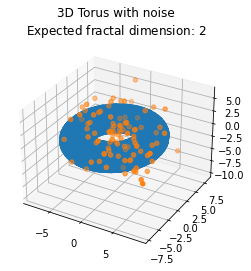

In [21]:
no_noise = 100
max_points = 9900
inner_dia = 2
outer_dia = 5
torus = sampleTorus3D(max_points, outer_dia, inner_dia)
noise = sampleNoise(no_noise, torus.shape[1], np.std(torus))
torus_with_noise = np.concatenate((torus, noise))
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(torus[:,0], torus[:,1], torus[:,2], 'xb')
ax.scatter(noise[:,0], noise[:,1], noise[:,2], 'or')
ax.set_title("3D Torus with noise\nExpected fractal dimension: $2$")
plt.show()


torus_with_noise = np.concatenate((torus, noise))

In [22]:
dimension = 0
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus_with_noise, dimension, alpha, max_sampling_size, step_size)

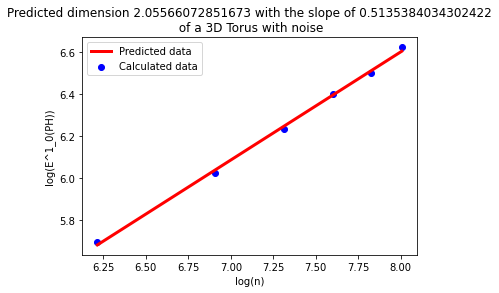

In [23]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus with noise")

In [24]:
dimension = 1
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus_with_noise, dimension, alpha, max_sampling_size, step_size)

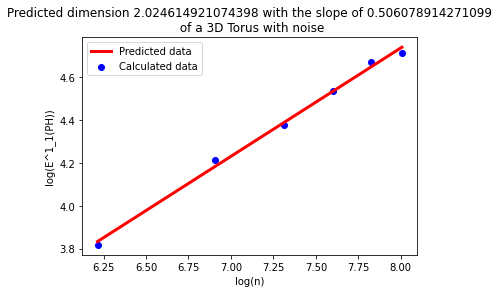

In [25]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus with noise")

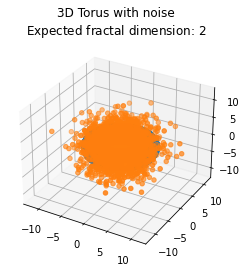

In [35]:
no_noise = 2500
max_points = 7500
inner_dia = 2
outer_dia = 5
torus = sampleTorus3D(max_points, outer_dia, inner_dia)
noise = sampleNoise(no_noise, torus.shape[1], np.std(torus))
torus_with_noise = np.concatenate((torus, noise))
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(torus[:,0], torus[:,1], torus[:,2], 'xb')
ax.scatter(noise[:,0], noise[:,1], noise[:,2], 'or')
ax.set_title("3D Torus with noise\nExpected fractal dimension: $2$")
plt.show()

torus_with_noise = np.concatenate((torus, noise))

In [36]:
dimension = 0
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus_with_noise, dimension, alpha, max_sampling_size, step_size)

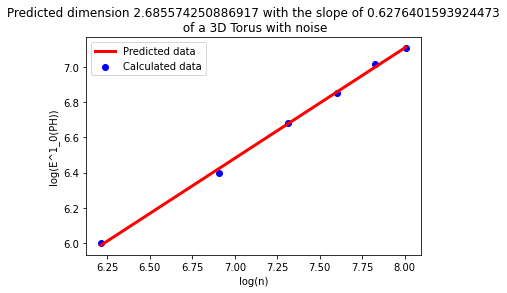

In [37]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus with noise")

In [38]:
dimension = 1
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus_with_noise, dimension, alpha, max_sampling_size, step_size)

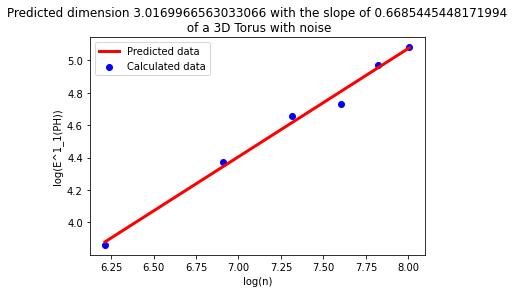

In [39]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus with noise")

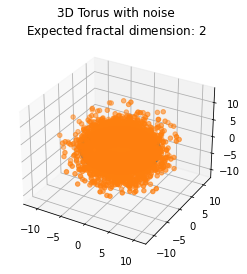

In [40]:
no_noise = 5000
max_points = 5000
inner_dia = 2
outer_dia = 5
torus = sampleTorus3D(max_points, outer_dia, inner_dia)
noise = sampleNoise(no_noise, torus.shape[1], np.std(torus))
torus_with_noise = np.concatenate((torus, noise))
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(torus[:,0], torus[:,1], torus[:,2], 'xb')
ax.scatter(noise[:,0], noise[:,1], noise[:,2], 'or')
ax.set_title("3D Torus with noise\nExpected fractal dimension: $2$")
plt.show()

torus_with_noise = np.concatenate((torus, noise))

In [41]:
dimension = 0
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus_with_noise, dimension, alpha, max_sampling_size, step_size)

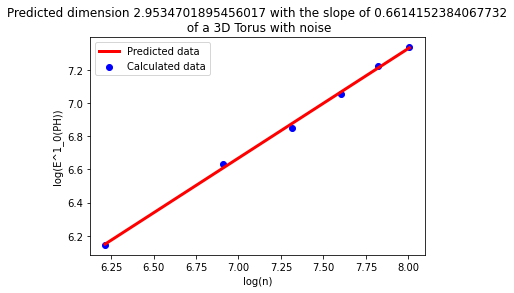

In [42]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus with noise")

In [43]:
dimension = 1
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(torus_with_noise, dimension, alpha, max_sampling_size, step_size)

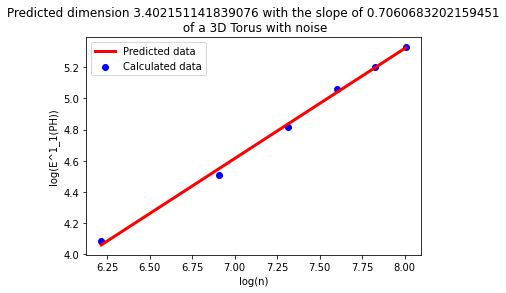

In [44]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Torus with noise")

In [6]:
no_samples = 10000
mean1, var1 = 2, 0.2
mean2, var2 = 3, 1
mean3, var3 = 1, 0.5

cloud1 = sampleNormal3D(int(no_samples/3), mean1, var1)
cloud2 = sampleNormal3D(int(no_samples/3), mean2, var2)
cloud3 = sampleNormal3D(int(no_samples/3), mean3, var3)

cloud = np.concatenate((cloud1, cloud2, cloud3))

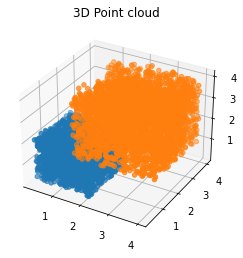

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(cloud1[:,0], cloud1[:,1], cloud1[:,2], 'xb')
ax.scatter(cloud2[:,0], cloud2[:,1], cloud2[:,2], 'or')
ax.scatter(cloud3[:,0], cloud3[:,1], cloud3[:,2], '.g')
ax.set_title("3D Point cloud")
plt.show()

In [8]:
dimension = 0
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cloud, dimension, alpha, max_sampling_size, step_size)

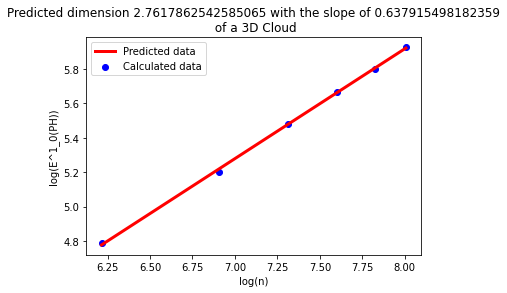

In [9]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Cloud")

In [10]:
dimension = 1
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cloud, dimension, alpha, max_sampling_size, step_size)

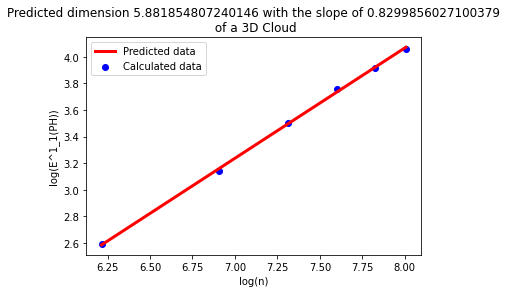

In [11]:
plotting(dimension, alpha, log_n, log_alpha_sum, est_dim, LR_fit, "3D Cloud")

In [ ]:
dimension = 2
alpha = 1
max_sampling_size = 3000
step_size = 500
log_n, log_alpha_sum, est_dim, LR_fit = estimatePersistentHomologyDimension(cloud, dimension, alpha, max_sampling_size, step_size)